In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dataset = keras.datasets.fashion_mnist
((img_train,id_train),(img_test,id_test)) = dataset.load_data()
dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [ ]:
print(f'qnt imagens de treino: {len(img_train)}')
print(f'qnt imagens de test: {len(img_test)}')

qnt imagens de treino: 60000
qnt imagens de test: 10000


In [ ]:
img_train.shape

(60000, 28, 28)

9

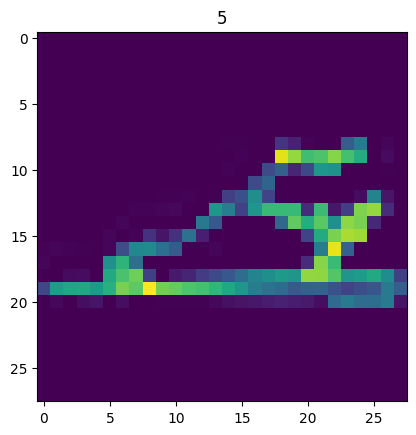

In [ ]:
plt.imshow(img_train[300])
plt.title(id_train[300])
id_train.max()

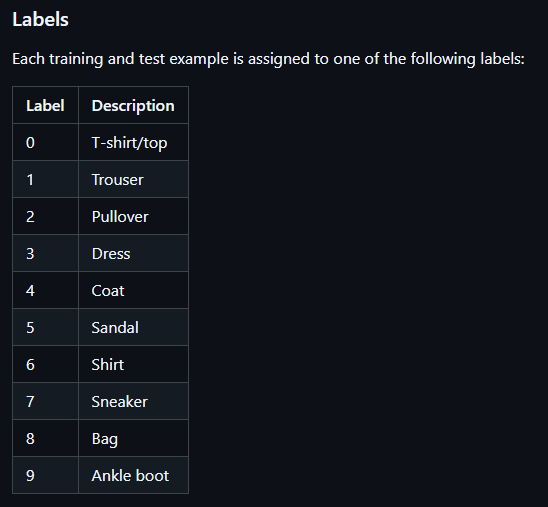

In [ ]:
nomes = ['Camiseta','Calça','Pullover','Vestido',
         'Casaco','Sandália','Camisa','Tenis','Bolsa','Bota']

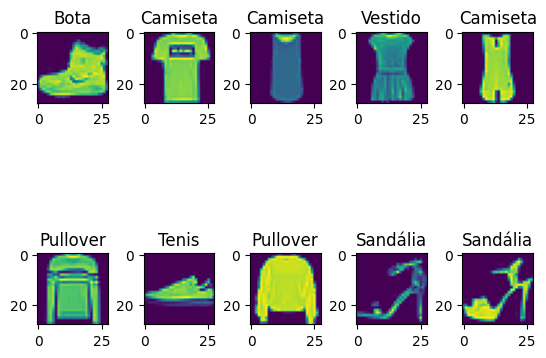

In [ ]:
for _ in range(10):
    plt.subplot(2,5, _ + 1)
    plt.imshow(img_train[_])
    #plt.colorbar()
    plt.title(nomes[id_train[_]])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

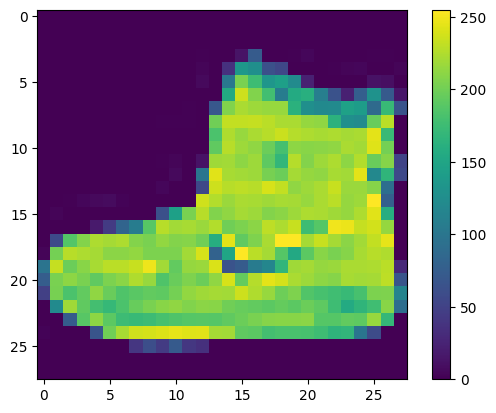

In [ ]:
plt.imshow(img_train[0])
plt.colorbar()
plt.grid(False)

In [ ]:
img_train = img_train / 255.0
img_test = img_test / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = model.fit(img_train, id_train, epochs=15, validation_split=0.2)

test_loss, test_acc = model.evaluate(img_test, id_test)

print('Test accuracy:', test_acc)
print('Loss:', test_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7612 - loss: 0.6721 - val_accuracy: 0.8588 - val_loss: 0.3935
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8523 - loss: 0.4029 - val_accuracy: 0.8725 - val_loss: 0.3578
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8690 - loss: 0.3621 - val_accuracy: 0.8770 - val_loss: 0.3470
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8760 - loss: 0.3363 - val_accuracy: 0.8751 - val_loss: 0.3512
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8818 - loss: 0.3175 - val_accuracy: 0.8790 - val_loss: 0.3318
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8876 - loss: 0.3013 - val_accuracy: 0.8793 - val_loss: 0.3277
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8919 - loss: 0.2895 - val_accuracy: 0.8848 - val_loss: 0.3246
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8899 - loss: 0.288

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)



> Output_Camada_Dense = ReLU (multiplica(input,kernel) + bias)
> Output_Camada_Dense = [(i*w) + b]


> kernel = peso

> bias = viés





In [ ]:
pesos_dense = model.layers[1].get_weights()[0]
print(pesos_dense)

[[-0.2519462  -0.0388891  -0.06162985 ... -0.0190726  -0.06403738
   0.03345665]
 [ 0.32781968  0.24136972 -0.03088357 ... -0.12471032 -0.04566745
   0.05329739]
 [-0.06650752  0.16353886 -0.02963813 ... -0.22431011 -0.01775038
  -0.29310992]
 ...
 [ 0.09520291  0.15552278 -0.01060203 ... -0.03429452 -0.06924421
   0.22346792]
 [-0.0169189   0.30557683 -0.02748904 ...  0.01952347  0.00838924
   0.21608569]
 [-0.00713176  0.5228752  -0.08670834 ...  0.02588146 -0.03428371
   0.32747275]]


In [ ]:
vieses_dense = model.layers[1].get_weights()[1]
print(vieses_dense)

[-0.11876419  0.00133131  0.22058205 -0.347699    0.32659876 -0.02653911
  0.1763717   0.4123886   0.07647708  0.13422263  0.2223296   0.19361435
  0.1379463   0.27142087  0.5459366   0.28840286 -0.01732626  0.29481956
  0.26852003  0.12380944 -0.4429988   0.5893211   0.19897038  0.22769411
  0.18243092  0.4942815  -0.01535253  0.13887495  0.0164209   0.40387213
 -0.3295895  -0.04890847  0.35674953  0.47821087  0.4120042   0.5378024
  0.19354449  0.23749791 -0.09960135  0.19979653  0.12794945  0.62046945
  0.2363136   0.23400553 -0.3948774   0.514067    0.21731302 -0.15368523
  0.5405873   0.17220846 -0.03485931 -0.264634   -0.12201798  0.18982041
  0.27244195  0.3906677  -0.2164837   0.05743851  0.31167907  0.16663423
 -0.5243563   0.26986867 -0.269729    0.55413526  0.2540009   0.29675084
 -0.02963958  0.51751     0.31677344  0.29205522  0.18578959 -0.01887987
 -0.08781192  0.13348264  0.2848616   0.4307596  -0.0369455  -0.01954126
  0.20702009 -0.7112115   0.0124507   0.22546929  0.

In [ ]:
historico.history

{'accuracy': [0.8128541707992554,
  0.8545833230018616,
  0.867354154586792,
  0.8755833506584167,
  0.8812916874885559,
  0.885937511920929,
  0.890958309173584,
  0.8919791579246521,
  0.8950416445732117,
  0.8984375,
  0.9010624885559082,
  0.9038333296775818,
  0.9052708148956299,
  0.9075624942779541,
  0.9097291827201843],
 'loss': [0.5258427858352661,
  0.3966653645038605,
  0.3630419075489044,
  0.33864685893058777,
  0.32092350721359253,
  0.3068997859954834,
  0.29634833335876465,
  0.28688502311706543,
  0.27743861079216003,
  0.2716895043849945,
  0.2627807557582855,
  0.25581100583076477,
  0.24959468841552734,
  0.2434084713459015,
  0.2390170693397522],
 'val_accuracy': [0.8588333129882812,
  0.8725000023841858,
  0.8769999742507935,
  0.875083327293396,
  0.8790000081062317,
  0.8793333172798157,
  0.8848333358764648,
  0.8858333230018616,
  0.8901666402816772,
  0.8851666450500488,
  0.8825833201408386,
  0.8894166946411133,
  0.89041668176651,
  0.8827499747276306,
  

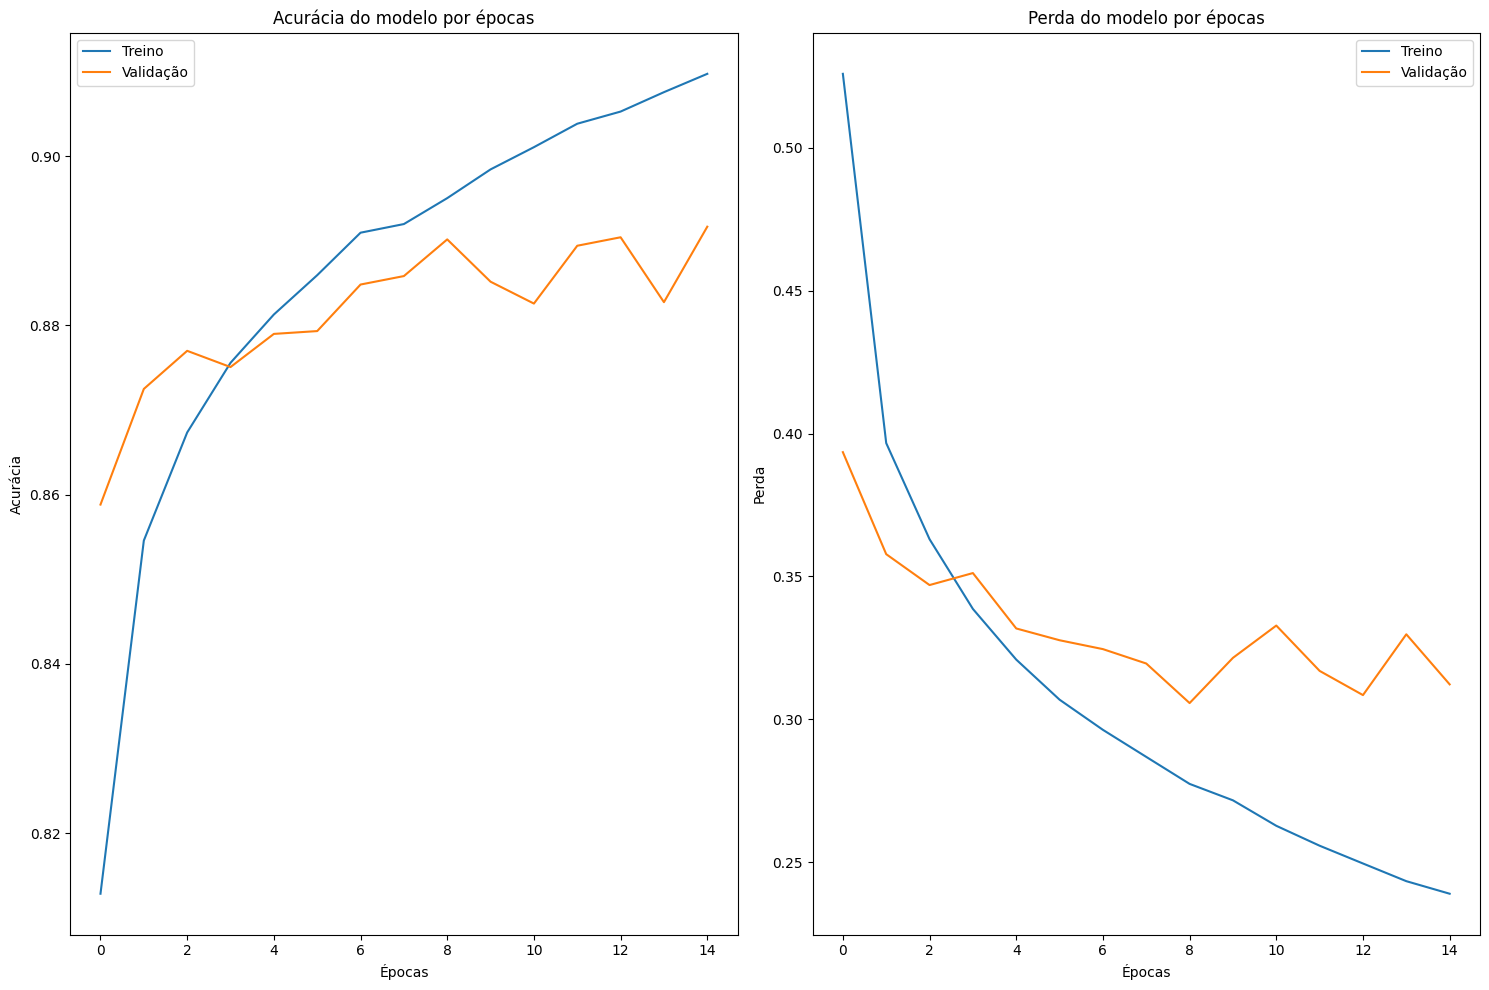

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,10))

axs[0].plot(historico.history['accuracy'], label='Treino')
axs[0].plot(historico.history['val_accuracy'], label='Validação')
axs[0].set_title('Acurácia do modelo por épocas')
axs[0].set_ylabel('Acurácia')
axs[0].set_xlabel('Épocas')
axs[0].legend(loc='upper left')

axs[1].plot(historico.history['loss'], label='Treino')
axs[1].plot(historico.history['val_loss'], label='Validação')
axs[1].set_title('Perda do modelo por épocas')
axs[1].set_ylabel('Perda')
axs[1].set_xlabel('Épocas')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


>  Modelo sofrendo overfitting, pois treino está respondendo muito bem e com pouco loss, mas para validação não obtivemos o mesmo resultado.







In [ ]:
predicoes = model.predict(img_test)
print(f'Resultado teste imagem 0: {np.argmax(predicoes[0])}')
print(f'Classe real: {id_test[0]}')
print(f'Resultado teste imagem 1: {np.argmax(predicoes[1])}')
print(f'Classe real: {id_test[1]}')
print(f'Resultado teste imagem 2: {np.argmax(predicoes[2])}')
print(f'Classe real: {id_test[2]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado teste imagem 0: 9
Classe real: 9
Resultado teste imagem 1: 2
Classe real: 2
Resultado teste imagem 2: 1
Classe real: 1


> Alterando os pesos e mantendo vieses

In [ ]:
pesos_dense.shape

(784, 256)

In [ ]:
pesos_dense_random = np.random.rand(784,256)

model.layers[1].set_weights([pesos_dense_random,vieses_dense])
model.layers[1].get_weights()

#bias = array[1]
#pesos = array[0]

[array([[0.0834189 , 0.00174651, 0.531694  , ..., 0.85272104, 0.47856566,
         0.13786659],
        [0.72831213, 0.92004585, 0.21230501, ..., 0.08087665, 0.44025078,
         0.07605198],
        [0.8310752 , 0.91067487, 0.3638982 , ..., 0.11986092, 0.4897484 ,
         0.06074442],
        ...,
        [0.3613959 , 0.18148834, 0.78270334, ..., 0.05369959, 0.76714003,
         0.6466226 ],
        [0.1917714 , 0.8628651 , 0.92309135, ..., 0.1397255 , 0.38653445,
         0.84194213],
        [0.5855721 , 0.10640875, 0.4397572 , ..., 0.86091554, 0.48906457,
         0.50738835]], dtype=float32),
 array([-0.11876419,  0.00133131,  0.22058205, -0.347699  ,  0.32659876,
        -0.02653911,  0.1763717 ,  0.4123886 ,  0.07647708,  0.13422263,
         0.2223296 ,  0.19361435,  0.1379463 ,  0.27142087,  0.5459366 ,
         0.28840286, -0.01732626,  0.29481956,  0.26852003,  0.12380944,
        -0.4429988 ,  0.5893211 ,  0.19897038,  0.22769411,  0.18243092,
         0.4942815 , -0.01535

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.002) #velocidade de treinamento

#para de treinar quando vê que loss estacionou. Encontrou um mínimo local
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss', save_best_only=True)]


model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = model.fit(img_train, id_train,
                      batch_size=120, epochs=15,
                      validation_split=0.2)

test_loss, test_acc = model.evaluate(img_test, id_test)

print('Test accuracy:', test_acc)
print('Loss:', test_loss)

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1006 - loss: 2.3347 - val_accuracy: 0.1003 - val_loss: 2.3054
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1007 - loss: 2.3038 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1015 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3029
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1021 - loss: 2.3026 - val_accuracy: 0.0983 - val_loss: 2.3027
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3029
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0992 - loss: 2.3028 - val_accuracy: 0.0983 - val_loss: 2.3027
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.

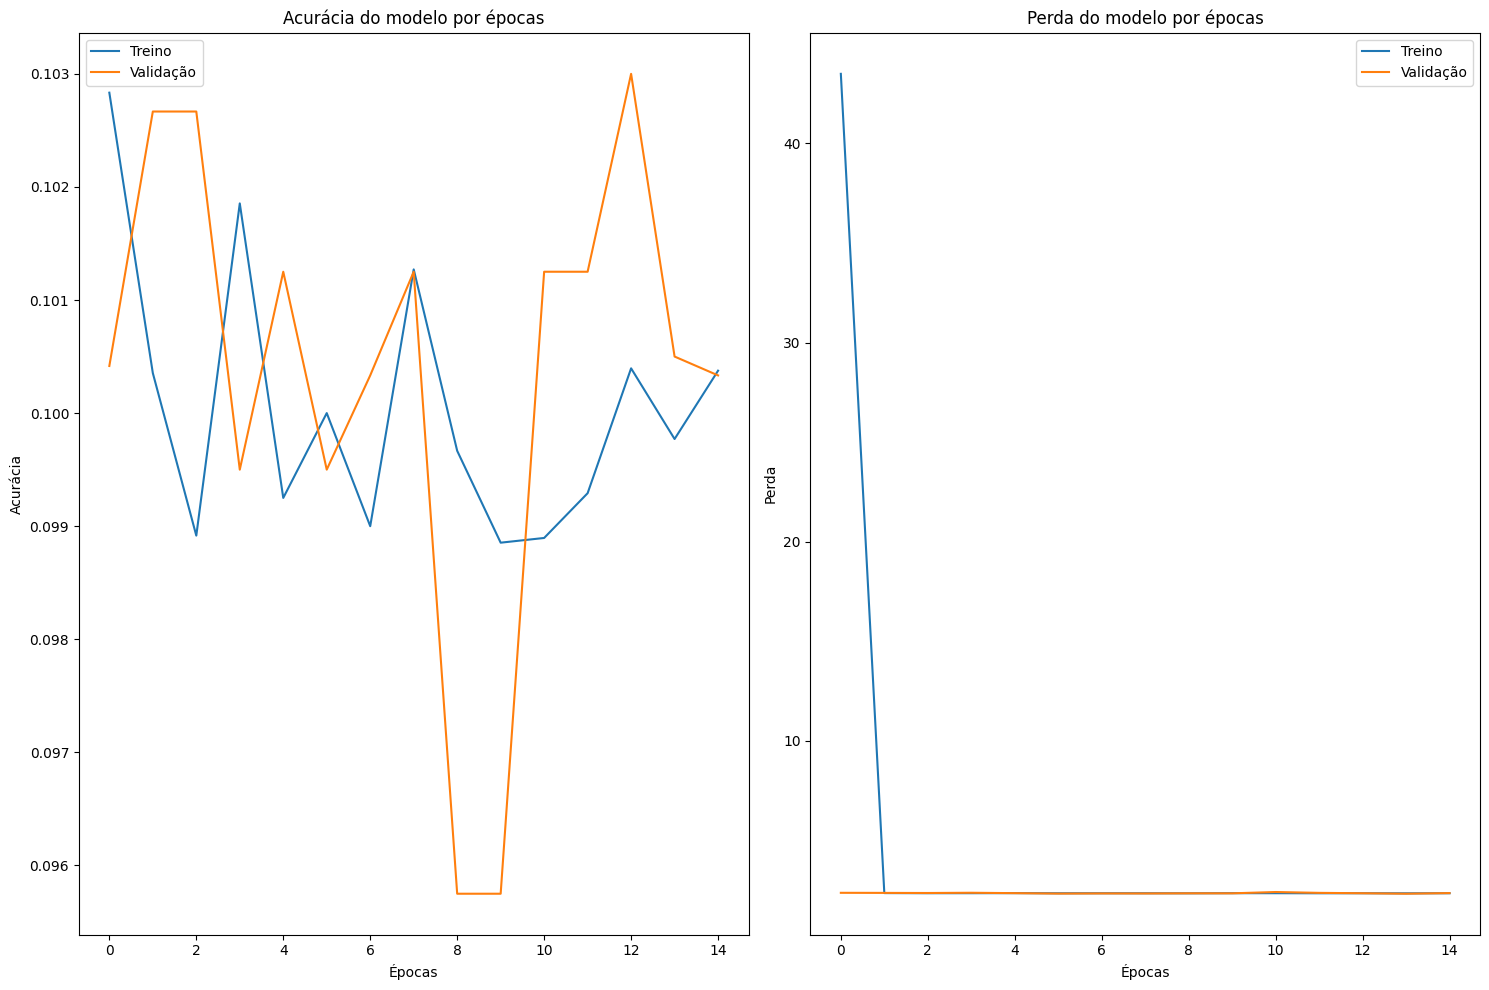

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,10))

axs[0].plot(historico.history['accuracy'], label='Treino')
axs[0].plot(historico.history['val_accuracy'], label='Validação')
axs[0].set_title('Acurácia do modelo por épocas')
axs[0].set_ylabel('Acurácia')
axs[0].set_xlabel('Épocas')
axs[0].legend(loc='upper left')

axs[1].plot(historico.history['loss'], label='Treino')
axs[1].plot(historico.history['val_loss'], label='Validação')
axs[1].set_title('Perda do modelo por épocas')
axs[1].set_ylabel('Perda')
axs[1].set_xlabel('Épocas')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units